IMPORTING NECESSARY LIBRARIES

In [1]:
# Long Short Term Memory - LSTM - type of recurrent neural network for learning long-term dependencies.
# Commonly used for processing and predicting on the basis of time - series data.

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

LOADING THE TRAINING DATASET

In [2]:
# The dataset is already splitted up into training and test dataset

# Loading the training dataset
df_train = pd.read_csv("AMZNtrain.csv")
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2.1.14,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,3.1.14,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,6.1.14,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,7.1.14,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,8.1.14,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [3]:
df_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1045,27.2.18,1524.500000,1526.780029,1507.209961,1511.979980,1511.979980,4808800
1046,28.2.18,1519.510010,1528.699951,1512.000000,1512.449951,1512.449951,4515000
1047,1.3.18,1513.599976,1518.489990,1465.000000,1493.449951,1493.449951,6835200
1048,23.7.18,1812.209961,1819.000000,1769.989990,1802.000000,1802.000000,3888500
1049,24.7.18,1829.010010,1840.000000,1809.380005,1829.239990,1829.239990,4278700


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1050 non-null   object 
 1   Open       1050 non-null   float64
 2   High       1050 non-null   float64
 3   Low        1050 non-null   float64
 4   Close      1050 non-null   float64
 5   Adj Close  1050 non-null   float64
 6   Volume     1050 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 57.6+ KB


In [23]:
# Changing datatype of date column from object to datetime - data preprocessing
df_train["Date"] = pd.to_datetime(df_train['Date'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1050 non-null   datetime64[ns]
 1   Open       1050 non-null   float64       
 2   High       1050 non-null   float64       
 3   Low        1050 non-null   float64       
 4   Close      1050 non-null   float64       
 5   Adj Close  1050 non-null   float64       
 6   Volume     1050 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 57.6 KB


PREPROCESSING THE TRAINING DATASET

In [6]:
# Dropping non available (missing) values from the dataset
df_train.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-01,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-03-01,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-06-01,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-07-01,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-08-01,398.470001,403.000000,396.040009,401.920013,401.920013,2316500
...,...,...,...,...,...,...,...
1045,2018-02-27,1524.500000,1526.780029,1507.209961,1511.979980,1511.979980,4808800
1046,2018-02-28,1519.510010,1528.699951,1512.000000,1512.449951,1512.449951,4515000
1047,2018-01-03,1513.599976,1518.489990,1465.000000,1493.449951,1493.449951,6835200
1048,2018-07-23,1812.209961,1819.000000,1769.989990,1802.000000,1802.000000,3888500


In [7]:
df_train.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1050,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1.050000e+03
mean,2016-02-04 17:26:24,651.149934,656.895685,644.517724,651.049791,651.049791,3.957117e+06
min,2014-01-04 00:00:00,284.399994,290.420013,284.000000,286.950012,286.950012,1.093000e+06
25%,2015-01-17 00:00:00,372.247505,375.989990,369.224991,373.057503,373.057503,2.642200e+06
50%,2016-01-31 00:00:00,616.074982,624.260010,605.410004,615.850006,615.850006,3.399400e+06
75%,2017-02-16 18:00:00,841.960007,845.915008,838.724991,843.905014,843.905014,4.443975e+06
max,2018-12-02 00:00:00,1829.010010,1840.000000,1809.380005,1829.239990,1829.239990,2.385610e+07
std,NaN,295.848287,297.954118,293.055015,295.772362,295.772362,2.268681e+06


In [8]:
# To consider only Close column as train data - iloc (index location) is used
training = df_train.iloc[:,4:5].values
training

array([[ 397.970001],
       [ 396.440002],
       [ 393.630005],
       ...,
       [1493.449951],
       [1802.      ],
       [1829.23999 ]])

In [9]:
# Rescaling data into values between 0 and 1 for better performances
scaler = MinMaxScaler(feature_range = (0,1))

# fit_transform to transform the values
training = scaler.fit_transform(training)
training

array([[0.07198386],
       [0.07099183],
       [0.06916987],
       ...,
       [0.78227827],
       [0.98233796],
       [1.        ]])

In [10]:
# Shape of training data
training.shape

(1050, 1)

In [11]:
# Preparing data for training
# Preparing input sequence with 20 Timesteps of x_train data and alongside their respective y_train labels(timestep = the len of the input sequence)
x_train = []
y_train = []

for i in range(20, 1050):   # 20 -> timestep ; 1050 -> length of training data
    x_train.append(training[i-20:i,0])
    y_train.append(training[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Adding another axis for batch size, since the input for an LSTM network is a 3D Tensor - it will have 'sequence length, timesteps, and batch size'
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # Adding the batch_size axis
x_train.shape

(1030, 20, 1)

BUILDING THE LSTM MODEL

In [13]:
# Building a model that has four layers of LSTM network, all followed by a dropout layer.
# Dropout - improves the generalization capabilities of LSTM networks by preventing overfitting.

model = Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))

# Dense layer is added in the end stages to get output in format needed by the user.
# Here, we are using LSTM for time series, then we should have Dense(1) so that only one numeric output is given.
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
# Training the model using 20 epochs and with a batch size of 35 using model.fit function
# Verbose = 2:  2 = one line per epoch. [verbose is an optional argument that is used to set the logging level during the model training and validation process.]
history = model.fit(x_train, y_train, epochs = 20, batch_size = 35, verbose = 2)

Epoch 1/20
30/30 - 8s - loss: 0.0128 - 8s/epoch - 267ms/step
Epoch 2/20
30/30 - 1s - loss: 0.0021 - 898ms/epoch - 30ms/step
Epoch 3/20
30/30 - 1s - loss: 0.0014 - 1s/epoch - 34ms/step
Epoch 4/20
30/30 - 1s - loss: 0.0011 - 1s/epoch - 40ms/step
Epoch 5/20
30/30 - 1s - loss: 0.0010 - 1s/epoch - 40ms/step
Epoch 6/20
30/30 - 1s - loss: 0.0012 - 1s/epoch - 40ms/step
Epoch 7/20
30/30 - 1s - loss: 0.0015 - 1s/epoch - 40ms/step
Epoch 8/20
30/30 - 1s - loss: 0.0011 - 1s/epoch - 40ms/step
Epoch 9/20
30/30 - 1s - loss: 0.0011 - 1s/epoch - 40ms/step
Epoch 10/20
30/30 - 1s - loss: 0.0011 - 1s/epoch - 40ms/step
Epoch 11/20
30/30 - 1s - loss: 0.0011 - 1s/epoch - 40ms/step
Epoch 12/20
30/30 - 1s - loss: 0.0011 - 1s/epoch - 40ms/step
Epoch 13/20
30/30 - 1s - loss: 0.0011 - 1s/epoch - 40ms/step
Epoch 14/20
30/30 - 1s - loss: 0.0011 - 1s/epoch - 40ms/step
Epoch 15/20
30/30 - 1s - loss: 0.0011 - 1s/epoch - 40ms/step
Epoch 16/20
30/30 - 1s - loss: 8.8028e-04 - 1s/epoch - 40ms/step
Epoch 17/20
30/30 - 1s - 

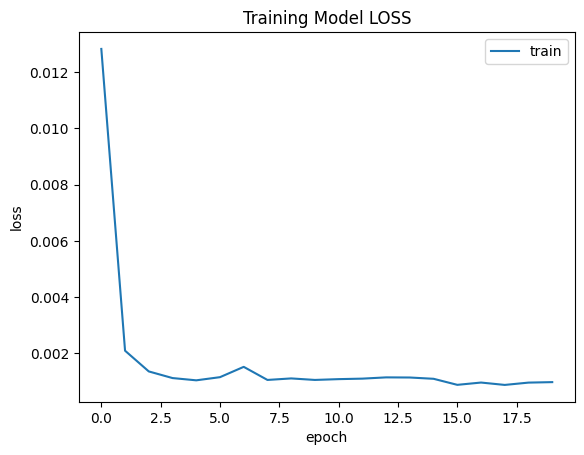

In [15]:
# Successfully finished training the model

# Visualizing the loss incured during the training process for each epoch using matplotlib libray
plt.plot(history.history['loss'])
plt.title('Training Model LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
# Legend - an area describing the elements of the graph
plt.legend(['train'], loc = 'upper right')
plt.show()

TESTING THE MODEL USING TEST DATASET

In [24]:
# Testing the model using the test dataset
# Continuing with same steps of importing the dataset, then selecting closing price values for testing
test_data = pd.read_csv("AMZNtest.csv")
test_data = test_data.dropna()
test_data = test_data.iloc[:, 4:5]

# Selecting labels for y_test data
y_test = test_data.iloc[20: ,0:].values
print(y_test.shape)
y_test

(209, 1)


array([[1718.72998 ],
       [1863.609985],
       [1808.      ],
       [1817.27002 ],
       [1779.219971],
       [1777.439941],
       [1797.170044],
       [1834.329956],
       [1823.290039],
       [1847.75    ],
       [1862.47998 ],
       [1886.52002 ],
       [1898.52002 ],
       [1886.300049],
       [1896.199951],
       [1919.650024],
       [1882.619995],
       [1886.52002 ],
       [1882.219971],
       [1876.709961],
       [1883.420044],
       [1904.900024],
       [1902.900024],
       [1905.390015],
       [1927.680054],
       [1932.819946],
       [1998.099976],
       [2002.380005],
       [2012.709961],
       [2039.51001 ],
       [1994.819946],
       [1958.310059],
       [1952.069946],
       [1939.01001 ],
       [1987.150024],
       [1990.      ],
       [1989.869995],
       [1970.189941],
       [1908.030029],
       [1941.050049],
       [1926.420044],
       [1944.300049],
       [1915.01001 ],
       [1934.359985],
       [1974.550049],
       [19

In [17]:
# Input array for the model
inputClose = test_data.iloc[:,0:].values
inputClose_scaled = scaler.transform(inputClose)
inputClose_scaled.shape

(229, 1)

In [18]:
x_test = []
length = len(test_data)
timestep = 20   

for i in range(timestep, length):
    x_test.append(inputClose_scaled[i-timestep:i,0])

# Converting the x_test data into a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
# Printing x_test shape
x_test.shape

(209, 20, 1)

PREDICTING THE MODEL OUTPUT

In [19]:
# Predicting the model output for test data
# Passing the x_test data 
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

7/7 [==============================] - 0s 14ms/step


In [20]:
# To plot the data between actual and predicted stock prices, inverse_transform function will be used over test_predict data
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

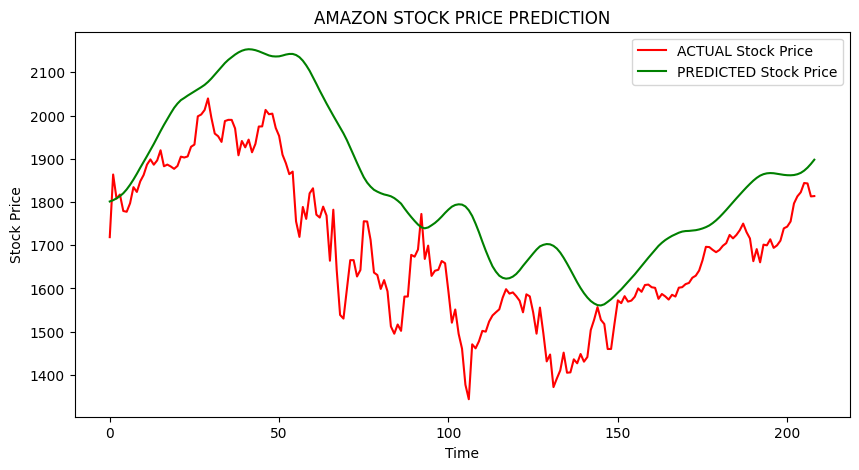

In [26]:
# Finally, plotting a graph in order to visualize the actual stock price and the predicted stock price
plt.figure(figsize = (10,5))
plt.plot(y_test, color = 'red', label = 'ACTUAL Stock Price')
plt.plot(test_predict, color = 'green', label = 'PREDICTED Stock Price')
plt.title('AMAZON STOCK PRICE PREDICTION')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()